In [1]:
# ---------- SisFall: quick viewer (fall vs ADL) ----------
# Requirements: pip install pandas matplotlib numpy

import os, re, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1) EDIT THIS: folder that contains SA01 ... SA38
BASE_DIR     = r"C:\Users\Aman\OneDrive\Desktop\IoT based Fall Detection System\SisFall_dataset"  # folder that has SA01, SA02, SE01...
SUBJECT_ID   = "SA01"          # e.g., "SA01" or "SE01"
EXAMPLE_FILE = "F01_SA01_R01.txt"            # e.g., "F01_SA01_R01.txt" or "D01_SA01_R01.txt"; set None to auto-pick first match
PREFER       = "F"             # "F" for Fall file, "D" for ADL file when auto-picking
FS           = 200.0           # sampling rate (Hz) ~200 for SisFall

In [3]:
def time_axis(n, fs=FS):
    return np.arange(n) / fs

def list_subject_dirs(base):
    sa = glob.glob(os.path.join(base, "SA*"))
    se = glob.glob(os.path.join(base, "SE*"))
    return sorted([p for p in sa + se if os.path.isdir(p)])

def pick_file(subject_dir, prefer="F", example_file=None):
    """Return a path to a file from subject_dir.
       If example_file is provided, use it.
       Else pick the first file starting with prefer ('F' or 'D')."""
    if example_file:
        path = os.path.join(subject_dir, example_file)
        if not os.path.exists(path):
            raise FileNotFoundError(f"Requested file not found: {path}")
        return path
    files = sorted(glob.glob(os.path.join(subject_dir, "*.txt")))
    pick = next((f for f in files if os.path.basename(f).startswith(prefer)), None)
    if not pick:
        raise FileNotFoundError(f"No file starting with '{prefer}' found in {subject_dir}")
    return pick

def load_sisfall_txt(path):
    """
    Robust loader for SisFall text files. Handles whitespace/semicolon/comma delimiters.
    Returns a dict with ax, ay, az, gx, gy, gz, and magnitudes.
    """
    # flexible separator; ignore commented lines if any
    df = pd.read_csv(path, sep=r"[;\s,]+", engine="python", header=None, comment="#")
    # keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    if df.shape[1] < 6:
        raise ValueError(f"{os.path.basename(path)} has {df.shape[1]} numeric columns (<6). Inspect manually.")
    # take the first 6 numeric columns as ax, ay, az, gx, gy, gz
    ax, ay, az, gx, gy, gz = [df.iloc[:, i].to_numpy(dtype=float) for i in range(6)]
    amag = np.sqrt(ax**2 + ay**2 + az**2)
    gmag = np.sqrt(gx**2 + gy**2 + gz**2)
    return {
        "ax": ax, "ay": ay, "az": az,
        "gx": gx, "gy": gy, "gz": gz,
        "amag": amag, "gmag": gmag,
        "n": len(ax)
    }

def plot_signals(sample, title_prefix, fs=FS):
    t = time_axis(sample["n"], fs=fs)

    # Accelerometer
    plt.figure(figsize=(10, 3.5))
    plt.plot(t, sample["ax"], label="ax")
    plt.plot(t, sample["ay"], label="ay")
    plt.plot(t, sample["az"], label="az")
    plt.plot(t, sample["amag"], label="|a|")
    plt.xlabel("Time (s)")
    plt.ylabel("Accelerometer")
    plt.title(f"{title_prefix} – Accelerometer")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gyroscope
    plt.figure(figsize=(10, 3.5))
    plt.plot(t, sample["gx"], label="gx")
    plt.plot(t, sample["gy"], label="gy")
    plt.plot(t, sample["gz"], label="gz")
    plt.plot(t, sample["gmag"], label="|g|")
    plt.xlabel("Time (s)")
    plt.ylabel("Gyroscope")
    plt.title(f"{title_prefix} – Gyroscope")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
def time_axis(n, fs=200.0):
    """SisFall is ~200 Hz; create a time vector (seconds)."""
    return np.arange(n) / fs

def plot_signals(sample, title_prefix):
    t = time_axis(len(sample["ax"]), fs=200.0)

    # Accelerometer (axes + magnitude)
    plt.figure(figsize=(10, 3.5))
    plt.plot(t, sample["ax"], label="ax")
    plt.plot(t, sample["ay"], label="ay")
    plt.plot(t, sample["az"], label="az")
    plt.plot(t, sample["amag"], label="|a|")
    plt.xlabel("Time (s)")
    plt.ylabel("Accel")
    plt.title(f"{title_prefix} – Accelerometer")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gyroscope (axes + magnitude)
    plt.figure(figsize=(10, 3.5))
    plt.plot(t, sample["gx"], label="gx")
    plt.plot(t, sample["gy"], label="gy")
    plt.plot(t, sample["gz"], label="gz")
    plt.plot(t, sample["gmag"], label="|g|")
    plt.xlabel("Time (s)")
    plt.ylabel("Gyro")
    plt.title(f"{title_prefix} – Gyroscope")
    plt.legend()
    plt.tight_layout()
    plt.show()



Using file: C:\Users\Aman\OneDrive\Desktop\IoT based Fall Detection System\SisFall_dataset\SA01\F01_SA01_R01.txt
Samples: 3000


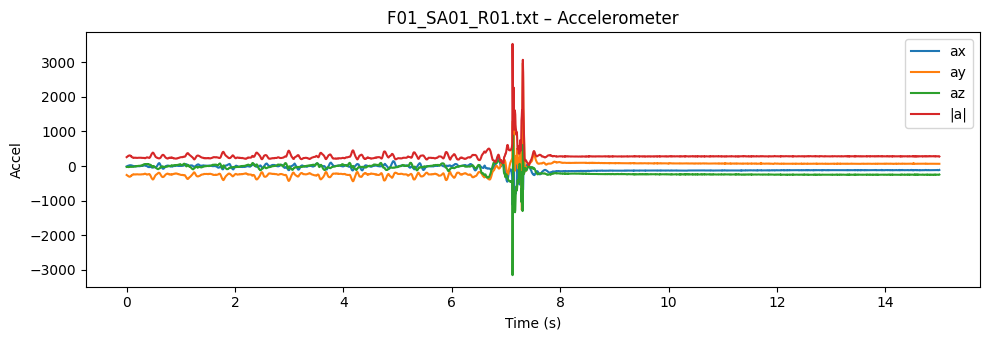

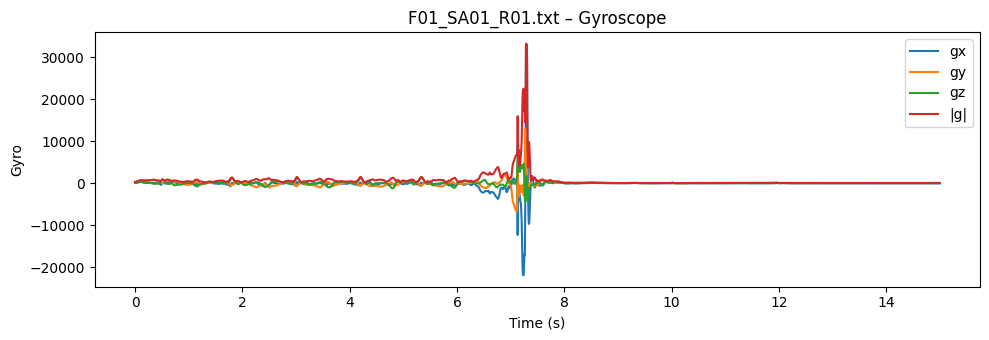

In [5]:
# ----------------- DRIVER -----------------
# sanity check base path
if not os.path.exists(BASE_DIR):
    raise SystemExit(f"BASE_DIR does not exist: {BASE_DIR}")

subjects = list_subject_dirs(BASE_DIR)
if not subjects:
    raise SystemExit("No SAxx/SExx folders found. Check BASE_DIR or OneDrive 'Always keep on this device'.")

# find the subject folder
subject_dir = os.path.join(BASE_DIR, SUBJECT_ID)
if not os.path.isdir(subject_dir):
    raise SystemExit(f"Subject folder not found: {subject_dir}")

# pick the file (either your EXAMPLE_FILE or the first matching 'F'/'D')
filepath = pick_file(subject_dir, prefer=PREFER, example_file=EXAMPLE_FILE)
print("Using file:", filepath)

# load and plot
sample = load_sisfall_txt(filepath)
print("Samples:", sample["n"])
plot_signals(sample, title_prefix=os.path.basename(filepath))

ADL file: D01_SA01_R01.txt


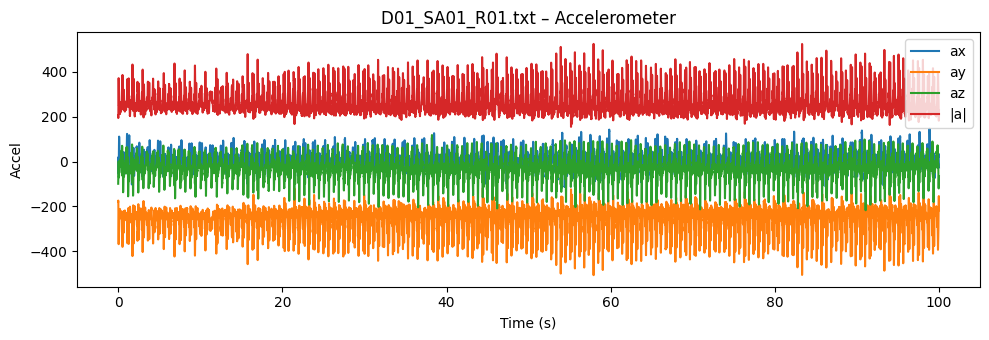

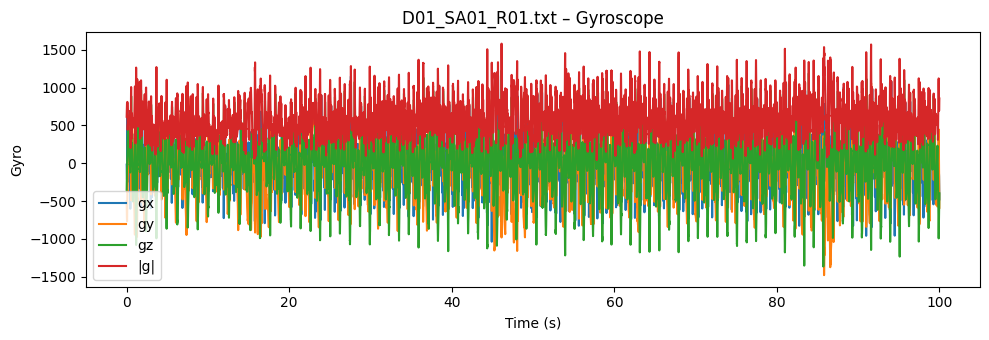

In [6]:
adl_file = os.path.join(BASE_DIR, "SA01", "D01_SA01_R01.txt")  # manually pick ADL file
print("ADL file:", os.path.basename(adl_file))

adl_sample = load_sisfall_txt(adl_file)
plot_signals(adl_sample, title_prefix=os.path.basename(adl_file))

In [7]:
import os, glob
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [8]:
# Output file for processed windows
OUTPATH = os.path.join(os.getcwd(), "sisfall_windows.npz")

# Windowing parameters (same as we discussed)
FS = 200.0                     # sampling frequency (Hz)
WINDOW_SECS = 2.56             # seconds per window
WINDOW_SIZE = int(WINDOW_SECS * FS)  # samples per window (512)
STEP = WINDOW_SIZE // 2        # 50% overlap (256)

In [9]:
# ---------------- helpers ----------------
def list_subject_dirs(base):
    sa = glob.glob(os.path.join(base, "SA*"))
    se = glob.glob(os.path.join(base, "SE*"))
    return sorted([p for p in sa + se if os.path.isdir(p)])

def load_sisfall_txt(path):
    # robust loader for numeric columns
    df = pd.read_csv(path, sep=r"[;\s,]+", engine="python", header=None, comment="#")
    df = df.select_dtypes(include=[np.number])
    if df.shape[1] < 6:
        raise ValueError(f"{os.path.basename(path)} has {df.shape[1]} numeric cols (<6).")
    return df.iloc[:, :6].to_numpy(dtype=float)  # shape (n_samples, 6)



In [10]:
# ---------------- run preprocessing ----------------
if not os.path.exists(BASE_DIR):
    raise SystemExit(f"BASE_DIR does not exist: {BASE_DIR} (update path and re-run)")

subjects = list_subject_dirs(BASE_DIR)
if not subjects:
    raise SystemExit("No subject folders (SA*/SE*) found under BASE_DIR.")

X_list = []
y_list = []
meta = []
per_subject = defaultdict(lambda: {'fall_files':0, 'adl_files':0, 'windows':0})

for subj in subjects:
    subj_id = os.path.basename(subj)
    files = sorted(glob.glob(os.path.join(subj, "*.txt")))
    for fpath in files:
        fname = os.path.basename(fpath)
        # label from filename prefix
        if fname.startswith("F"):
            label = 1
            per_subject[subj_id]['fall_files'] += 1
        elif fname.startswith("D"):
            label = 0
            per_subject[subj_id]['adl_files'] += 1
        else:
            continue  # skip unexpected files

        try:
            arr = load_sisfall_txt(fpath)  # (n_samples, 6)
        except Exception as e:
            print("Skipping file due to load error:", fname, "->", e)
            continue

        n = arr.shape[0]
        if n < WINDOW_SIZE:
            # too short to form one window; skip (alternatively pad)
            continue

        # sliding windows
        for start in range(0, n - WINDOW_SIZE + 1, STEP):
            end = start + WINDOW_SIZE
            window = arr[start:end, :]   # (WINDOW_SIZE, 6)
            X_list.append(window)
            y_list.append(label)
            meta.append({'subject': subj_id, 'file': fname, 'start': start, 'end': end})
            per_subject[subj_id]['windows'] += 1

# Convert to arrays and save
if len(X_list) == 0:
    raise SystemExit("No windows were created. Check WINDOW_SIZE/STEP or contents of files.")

X = np.array(X_list, dtype=np.float32)  # shape (N_windows, WINDOW_SIZE, 6)
y = np.array(y_list, dtype=np.int64)

np.savez_compressed(OUTPATH, X=X, y=y, meta=meta, fs=FS, window_size=WINDOW_SIZE, step=STEP)
print(f"Saved windows dataset -> {OUTPATH}")
print("X.shape:", X.shape, " y.shape:", y.shape)
print("Class counts: ADL (0) =", int((y==0).sum()), ", Fall (1) =", int((y==1).sum()))

# Quick per-subject summary (first 12 rows)
summary = []
for subj, stats in sorted(per_subject.items())[:12]:
    summary.append((subj, stats['fall_files'], stats['adl_files'], stats['windows']))
print("\nExample per-subject summary (subj, fall_files, adl_files, windows):")
for row in summary:
    print(row)

Saved windows dataset -> c:\Users\Aman\OneDrive\Desktop\IoT based Fall Detection System\sisfall_windows.npz
X.shape: (55089, 512, 6)  y.shape: (55089,)
Class counts: ADL (0) = 37109 , Fall (1) = 17980

Example per-subject summary (subj, fall_files, adl_files, windows):
('SA01', 75, 79, 1808)
('SA02', 75, 79, 1808)
('SA03', 75, 79, 1808)
('SA04', 75, 79, 1808)
('SA05', 75, 79, 1808)
('SA06', 75, 79, 1808)
('SA07', 75, 79, 1808)
('SA08', 75, 79, 1808)
('SA09', 75, 79, 1808)
('SA10', 75, 79, 1808)
('SA11', 75, 79, 1808)
('SA12', 75, 79, 1808)


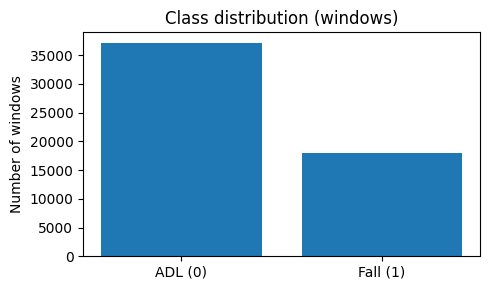

In [11]:
# Show class distribution plot
plt.figure(figsize=(5,3))
plt.bar(['ADL (0)','Fall (1)'], [int((y==0).sum()), int((y==1).sum())])
plt.title("Class distribution (windows)")
plt.ylabel("Number of windows")
plt.tight_layout()
plt.show()

In [12]:
import numpy as np
data = np.load("sisfall_windows.npz", allow_pickle=True)
X, y, meta = data["X"], data["y"], data.get("meta", None)
print("X.shape, y.shape:", X.shape, y.shape)
print("Class counts:", int((y==0).sum()), int((y==1).sum()))
print("Example meta[0]:", meta[0] if meta is not None and len(meta)>0 else "no meta")
# check for NaNs
print("Any NaNs:", np.isnan(X).any())


X.shape, y.shape: (55089, 512, 6) (55089,)
Class counts: 37109 17980
Example meta[0]: {'subject': 'SA01', 'file': 'D01_SA01_R01.txt', 'start': 0, 'end': 512}
Any NaNs: False


In [13]:
from collections import defaultdict
import random

# Build subject -> index mapping
subj2idxs = defaultdict(list)
for i, m in enumerate(meta):
    subj2idxs[m['subject']].append(i)

subjects = sorted(subj2idxs.keys())
random.seed(42)
random.shuffle(subjects)

# Split 80% subjects for training, 20% for testing
n_test = max(1, int(0.2 * len(subjects)))
test_subjs = set(subjects[:n_test])

train_idxs, test_idxs = [], []
for s, idxs in subj2idxs.items():
    if s in test_subjs:
        test_idxs.extend(idxs)
    else:
        train_idxs.extend(idxs)

print(f"Train windows: {len(train_idxs)}, Test windows: {len(test_idxs)}")
print("Test subjects:", test_subjs)


Train windows: 46273, Test windows: 8816
Test subjects: {'SA11', 'SE12', 'SE11', 'SE07', 'SA13', 'SE10', 'SA12'}


In [14]:
import torch
from torch.utils.data import Dataset, DataLoader

class SisFallWindows(Dataset):
    def __init__(self, X, y, idxs):
        self.X = X[idxs].astype("float32")
        self.y = y[idxs].astype("int64")
    def __len__(self): return len(self.y)
    def __getitem__(self, i):
        x = self.X[i]
        x = (x - x.mean(axis=0)) / (x.std(axis=0) + 1e-8)  # normalize per window
        return torch.from_numpy(x), torch.tensor(self.y[i])

train_ds = SisFallWindows(X, y, train_idxs)
test_ds  = SisFallWindows(X, y, test_idxs)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False)

print("Train size:", len(train_ds), " Test size:", len(test_ds))


Train size: 46273  Test size: 8816


In [15]:
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=6, hidden=128, layers=1, dropout=0.3):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden, num_layers=layers,
                            batch_first=True, dropout=dropout if layers>1 else 0.0)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden, 2)  # binary classification
    def forward(self, x):
        out, _ = self.lstm(x)
        last = out[:, -1, :]  # use last time-step output
        last = self.dropout(last)
        return self.fc(last)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier().to(device)
print(model)


LSTMClassifier(
  (lstm): LSTM(6, 128, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)


In [16]:
import torch.optim as optim
from collections import Counter

counts = Counter(y[train_idxs])
weights = torch.tensor([counts[0], counts[1]], dtype=torch.float32)
weights = weights.sum() / (weights + 1e-8)
criterion = nn.CrossEntropyLoss(weight=weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=1e-3)


Starting training...

Epoch 01 | loss=0.3259 | acc=0.814 | f1=0.694
  -> Best model saved!

Epoch 02 | loss=0.3085 | acc=0.818 | f1=0.696
  -> Best model saved!

Epoch 03 | loss=0.2970 | acc=0.803 | f1=0.684
Epoch 04 | loss=0.2841 | acc=0.812 | f1=0.696
Epoch 05 | loss=0.2752 | acc=0.861 | f1=0.742
  -> Best model saved!

Epoch 06 | loss=0.2658 | acc=0.826 | f1=0.712
Epoch 07 | loss=0.2583 | acc=0.817 | f1=0.703
Epoch 08 | loss=0.2411 | acc=0.840 | f1=0.719
Epoch 09 | loss=0.2352 | acc=0.827 | f1=0.712
Epoch 10 | loss=0.2309 | acc=0.850 | f1=0.729
Epoch 11 | loss=0.2246 | acc=0.855 | f1=0.744
  -> Best model saved!

Epoch 12 | loss=0.2181 | acc=0.839 | f1=0.725
Epoch 13 | loss=0.2158 | acc=0.838 | f1=0.723
Epoch 14 | loss=0.2118 | acc=0.813 | f1=0.695
Epoch 15 | loss=0.1978 | acc=0.819 | f1=0.707
Epoch 16 | loss=0.1924 | acc=0.831 | f1=0.717
Epoch 17 | loss=0.1884 | acc=0.840 | f1=0.721
Epoch 18 | loss=0.1879 | acc=0.865 | f1=0.740
Epoch 19 | loss=0.1832 | acc=0.874 | f1=0.754
  -> Bes

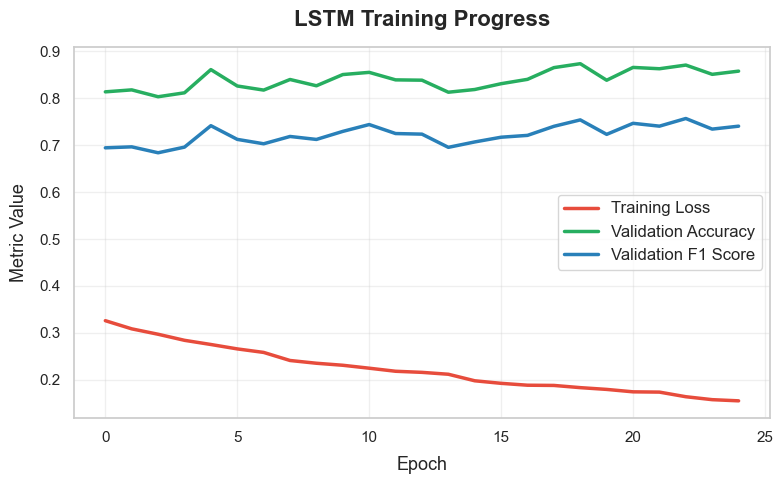

In [ ]:

#LSTM TRAINING LOOP WITH METRIC TRACKING + PLOTTING

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# --- Initialize metric trackers ---
train_losses = []
val_accs = []
val_f1s = []

epochs = 25  # you can increase later if needed
best_f1 = 0.0

print("Starting training...\n")

for epoch in range(1, epochs+1):
    model.train()
    total_loss = 0.0

    # 1️⃣ Training Phase
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)

    total_loss /= len(train_loader.dataset)

    # 2️⃣ Validation Phase
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            p = logits.argmax(dim=1).cpu().numpy()
            preds.append(p)
            trues.append(yb.cpu().numpy())

    y_true = np.concatenate(trues)
    y_pred = np.concatenate(preds)

    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')

    # --- Log and store metrics ---
    train_losses.append(total_loss)
    val_accs.append(acc)
    val_f1s.append(f1)

    print(f"Epoch {epoch:02d} | loss={total_loss:.4f} | acc={acc:.3f} | f1={f1:.3f}")

    # --- Save best model by F1-score ---
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), "best_lstm.pth")
        print("  -> Best model saved!\n")

print("\n✅ Training completed successfully!")
print(f"Best F1 Score achieved: {best_f1:.3f}")

#  Plot the training curves


sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))

plt.plot(train_losses, label='Training Loss', color='#E74C3C', linewidth=2.5)
plt.plot(val_accs, label='Validation Accuracy', color='#27AE60', linewidth=2.5)
plt.plot(val_f1s, label='Validation F1 Score', color='#2980B9', linewidth=2.5)

plt.title("LSTM Training Progress", fontsize=16, weight='bold', pad=15)
plt.xlabel("Epoch", fontsize=13, labelpad=8)
plt.ylabel("Metric Value", fontsize=13, labelpad=8)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()





Constructed test_loader from sisfall_windows.npz: #test_windows = 8816
Loaded model weights from best_lstm.pth

===== Final Evaluation =====
Samples (test): 8816
Accuracy : 0.8707
Precision: 0.7276
Recall   : 0.7884
F1 Score : 0.7568
Confusion Matrix:
 [[5902  664]
 [ 476 1774]]


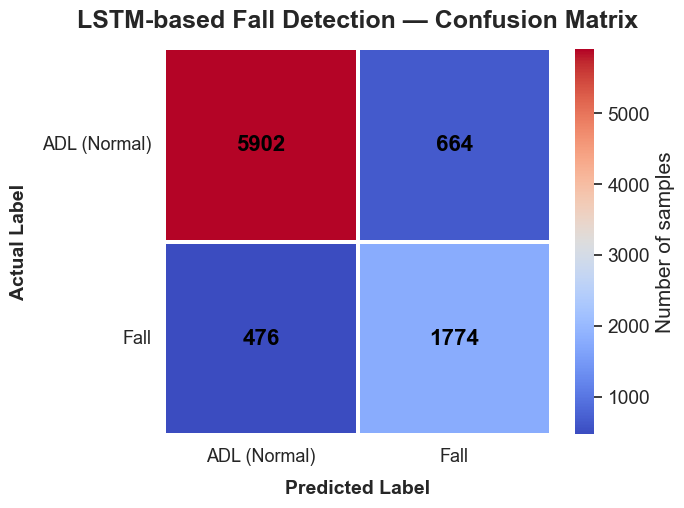

Saved heatmap to: LSTM_confusion_matrix.png


In [2]:
# ===== Final evaluation + publication-ready heatmap =====
import os, numpy as np, torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# ----- Config -----
WEIGHTS_PATH = "best_lstm.pth"                # ensure this file exists in cwd
HEATMAP_OUT   = "LSTM_confusion_matrix.png"   # saved image
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----- Define model class (must match training) -----
import torch.nn as nn
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_size=128, num_layers=1, dropout=0.3):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_size, num_layers=num_layers,
                            batch_first=True, dropout=dropout if num_layers>1 else 0.0)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 2)
    def forward(self, x):
        # x: (batch, seq_len, input_dim)
        out, _ = self.lstm(x)
        last = out[:, -1, :]
        last = self.dropout(last)
        return self.fc(last)

# ----- Try to obtain input_dim and test_loader -----
test_loader_exists = 'test_loader' in globals()
if test_loader_exists:
    # infer input_dim from a batch
    try:
        xb, yb = next(iter(test_loader))
        input_dim = xb.shape[2]
    except Exception:
        xb = None
        input_dim = None
else:
    xb = None
    input_dim = None

# If we don't have test_loader or input_dim, load from npz
if (not test_loader_exists) or (input_dim is None):
    npz_path = "sisfall_windows.npz"
    if not os.path.exists(npz_path):
        raise SystemExit("No test_loader in memory and sisfall_windows.npz not found. Run preprocessing first or create test_loader.")
    data = np.load(npz_path, allow_pickle=True)
    X = data["X"]  # (N, seq_len, features)
    y = data["y"]
    meta = data.get("meta", None)
    # Build a simple subject-wise split same as training: use 20% subjects for test
    from collections import defaultdict
    subj2idxs = defaultdict(list)
    if meta is None:
        # fallback stratified split if no meta
        from sklearn.model_selection import train_test_split
        idxs = np.arange(len(y))
        train_idx, test_idx = train_test_split(idxs, test_size=0.2, stratify=y, random_state=42)
    else:
        for i, m in enumerate(meta):
            subj2idxs[m['subject']].append(i)
        subjects = sorted(subj2idxs.keys())
        import random
        random.Random(42).shuffle(subjects)
        n_test = max(1, int(0.2 * len(subjects)))
        test_subjs = set(subjects[:n_test])
        test_idx = []
        for s, idxs in subj2idxs.items():
            if s in test_subjs:
                test_idx.extend(idxs)
    # create a DataLoader for test
    import torch
    from torch.utils.data import Dataset, DataLoader
    class SimpleWindowDataset(Dataset):
        def __init__(self, X, y, idxs):
            self.X = X[idxs].astype("float32")
            self.y = y[idxs].astype("int64")
        def __len__(self): return len(self.y)
        def __getitem__(self, i):
            x = self.X[i]
            # per-window normalize (same as training)
            x = (x - x.mean(axis=0)) / (x.std(axis=0) + 1e-8)
            return torch.from_numpy(x), torch.tensor(self.y[i], dtype=torch.long)
    test_ds = SimpleWindowDataset(X, y, test_idx)
    test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)
    input_dim = X.shape[2]
    print(f"Constructed test_loader from {npz_path}: #test_windows = {len(test_ds)}")

# ----- Instantiate and load model -----
model = LSTMClassifier(input_dim=input_dim, hidden_size=128, num_layers=1, dropout=0.3).to(DEVICE)

if not os.path.exists(WEIGHTS_PATH):
    raise SystemExit(f"Could not find weights file: {WEIGHTS_PATH}. Make sure training saved best_lstm.pth in this folder.")
ckpt = torch.load(WEIGHTS_PATH, map_location=DEVICE)
# ckpt might be a dict with 'model_state_dict' or state_dict directly
if isinstance(ckpt, dict) and 'model_state_dict' in ckpt:
    model.load_state_dict(ckpt['model_state_dict'])
else:
    model.load_state_dict(ckpt)
print("Loaded model weights from", WEIGHTS_PATH)

# ----- Evaluation -----
model.eval()
y_trues, y_preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(DEVICE)
        logits = model(xb)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        y_trues.append(yb.numpy())
        y_preds.append(preds)

y_true = np.concatenate(y_trues)
y_pred = np.concatenate(y_preds)

acc = accuracy_score(y_true, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
cm = confusion_matrix(y_true, y_pred)

print("\n===== Final Evaluation =====")
print(f"Samples (test): {len(y_true)}")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print("Confusion Matrix:\n", cm)

# ----- Pretty heatmap -----
plt.figure(figsize=(7,6))
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.25)

ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=1.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink':0.8, 'label':'Number of samples'},
    annot_kws={"size":16, "weight":"bold", "color":"black"}
)

ax.set_title("LSTM-based Fall Detection — Confusion Matrix", fontsize=18, weight='bold', pad=15)
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=10, weight='bold')
ax.set_ylabel("Actual Label", fontsize=14, labelpad=10, weight='bold')
ax.set_xticklabels(["ADL (Normal)", "Fall"], fontsize=13)
ax.set_yticklabels(["ADL (Normal)", "Fall"], fontsize=13, rotation=0)

plt.tight_layout()
plt.savefig(HEATMAP_OUT, dpi=400, bbox_inches='tight')
plt.show()
print("Saved heatmap to:", HEATMAP_OUT)



Using device: cpu


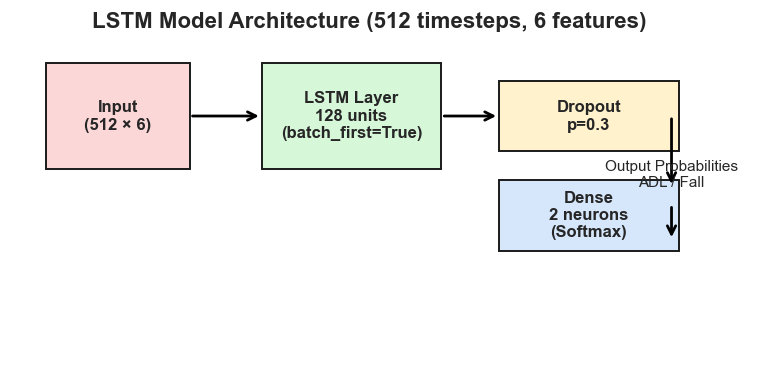

In [ ]:

# LSTM Architecture Visualization 


import torch
import matplotlib.pyplot as plt

# Define the device (for model compatibility)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# (Optional) verify GPU usage
print(f"Using device: {device}")

# Start drawing
plt.figure(figsize=(8,4))
ax = plt.gca()
ax.axis('off')

# Helper function to draw boxes
def draw_box(x, y, w, h, text, fontsize=11, facecolor='#e0f3ff'):
    rect = plt.Rectangle((x, y), w, h, ec='k', lw=1.4, fc=facecolor, zorder=2)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha='center', va='center', fontsize=fontsize, weight='bold')

# Draw model blocks
draw_box(0.05, 0.55, 0.2, 0.3, "Input\n(512 × 6)", fontsize=12, facecolor='#fbd7d7')
draw_box(0.35, 0.55, 0.25, 0.3, "LSTM Layer\n128 units\n(batch_first=True)", fontsize=12, facecolor='#d7f7d9')
draw_box(0.68, 0.6, 0.25, 0.2, "Dropout\np=0.3", fontsize=12, facecolor='#fff2cc')
draw_box(0.68, 0.32, 0.25, 0.2, "Dense\n2 neurons\n(Softmax)", fontsize=12, facecolor='#d7e7fb')

# Arrow helper
def draw_arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Connect blocks with arrows
draw_arrow(0.25, 0.7, 0.35, 0.7)
draw_arrow(0.6, 0.7, 0.68, 0.7)
draw_arrow(0.92, 0.7, 0.92, 0.5)
draw_arrow(0.92, 0.45, 0.92, 0.35)

# Titles and labels
plt.text(0.5, 0.95, "LSTM Model Architecture (512 timesteps, 6 features)", 
         ha='center', fontsize=16, weight='bold')
plt.text(0.92, 0.5, "Output Probabilities\nADL / Fall", ha='center', fontsize=11)

plt.xlim(0, 1.05)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("LSTM_Architecture.png", dpi=300, bbox_inches='tight')
plt.show()
